# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Import the fetal YS progenitor compartment

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/ys_total_annotation_20191127.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 10071 × 32084 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'cell.labels', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'LouvainClustering', 'predicted.cell.labels', 'full.ids', 'batch', 'bh_pval', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'n_counts', 'louvain', 'is_doublet', 'is_doublet_poptrim', 'res.30', 'backlabeled_1', 'cell.labels_progen'

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC progenitor                78
Early mast cell             133
Endothelium                 160
Erythroid AB                892
Erythroid EZ               1167
Erythroid M                 275
ILC precursor                25
Lymphoid progenitor         184
MEMP                        121
Monocyte                     38
Myeloid progenitor           61
NK early                     50
yolk sac Macrophage I      3063
yolk sac Macrophage II     3619
yolk sac progenitor/MPP     205
dtype: int64

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
CMP                    55
ELP                   174
GMP                    40
HSC                   105
MEMP                   55
MEP                    56
Monocyte precursor     26
macrophage             42
neut myeloid           18
dtype: int64

In [7]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [8]:
adata = adata[adata.obs['cell.labels_progen'].isin(['HSC', 'MEMP', 'GMP', 'CMP', 'ELP', 'MEP'])].copy()

In [9]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
CMP      55
ELP     174
GMP      40
HSC     105
MEMP     55
MEP      56
dtype: int64

In [10]:
adata.obs["dataset"] = "ys"
adata.obs['cell.labels'] = adata.obs['cell.labels_progen']

In [11]:
ys = adata

# Import the fetal liver progenitor compartment

In [12]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [13]:
adata

AnnData object with n_obs × n_vars = 113063 × 27080 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'cell.labels', 'combined.labels', 'batch', 'sample', 'n_counts', 'cell.labels_progen'
    obsm: 'X_fdg', 'X_tsne', 'X_umap'

In [14]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [15]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [16]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
ELP                        525
GMP                        362
HSC                        242
MEMP                       505
MEP                        639
MPP                       2012
early MK                    81
early erythroid            333
eo/baso/mast precursor      86
erythroid-MPP hybrid        14
macrophage                  81
myeloid DC progenitor       94
pDC progenitor              41
dtype: int64

In [17]:
adata = adata[adata.obs['cell.labels_progen'].isin(['HSC', 'MEMP', 'GMP', 'ELP', 'MPP', 'MEP', 
                                                    'eo/baso/mast precursor', 'myeloid DC progenitor', 
                                                   'pDC progenitor'])].copy()

In [18]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
ELP                        525
GMP                        362
HSC                        242
MEMP                       505
MEP                        639
MPP                       2012
eo/baso/mast precursor      86
myeloid DC progenitor       94
pDC progenitor              41
dtype: int64

In [19]:
adata.obs["dataset"] = "liver"
adata.obs['cell.labels'] = adata.obs['cell.labels_progen']

In [20]:
liver = adata

# Import the FBM progenitor compartment

In [21]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200718.h5ad')

In [22]:
adata

AnnData object with n_obs × n_vars = 104562 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200718', 'nk_meta'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [23]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell             327
CD8 T cell             171
CD14 monocyte         8787
CD56 bright NK         450
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1493
tDC                    193
tip EC                 363
Length: 64, dtype: int64

In [24]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [25]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'LMPP', 'MPP myeloid', 'MEMP', 'MEP', 'CMP', 'ELP', 
                                            'eo/baso/mast precursor', 'GMP', 'myeloid DC progenitor', 
                                             'pDC progenitor'])].copy()

In [26]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP                        425
ELP                       1358
GMP                       1285
HSC                         92
LMPP                        34
MEMP                        16
MEP                        269
MPP myeloid                 92
eo/baso/mast precursor     175
myeloid DC progenitor       31
pDC progenitor              23
dtype: int64

In [27]:
adata.obs["dataset"] = "FBM"

In [28]:
fbm = adata

# Import the ABM progenitor compartment

In [29]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/adult_bm/data/abm_raw_dr_20200717.h5ad')

In [30]:
adata

AnnData object with n_obs × n_vars = 142026 × 33694 
    obs: 'sample', 'lanes', 'sex', 'age', 'ethnicity', 'mad_prd', 'auto_prd', 'cell.labels', 'cell.labels2', 'leiden', 'percent.mito', 'nGene', 'nUMI', 'cell.labels_july', 'cell.labels_20200717'
    var: 'gene_ids'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [31]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte             3670
CD16 monocyte             1938
CD56 bright NK            1228
CLP                        882
CMP                        288
DC1                        135
DC2                        481
DC3                        550
DC precursor               462
HSC                        497
LMPP                        80
MEMP                       785
MK                         577
MOP                       1440
MPP                        365
Treg                      6327
early MK                   136
early erythroid           5441
erythroid macrophage        77
immature B cell           2728
late erythroid            1150
mature CD8 T cell        15725
mature NK                 6074
memory B cell             4106
memory CD4 T cell        22197
mid erythroid             2192
monocyte-DC                515
myelocyte                 6675
myeloid DC progenitor      110
naive B cell             19265
naive CD4 T cell          5873
naive CD8 T cell          8

In [32]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [33]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'LMPP', 'MPP', 'MEMP', 'CMP', 'CLP', 
                                             'myeloid DC progenitor'])].copy()

In [34]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CLP                      882
CMP                      288
HSC                      497
LMPP                      80
MEMP                     785
MPP                      365
myeloid DC progenitor    110
dtype: int64

In [35]:
adata.obs["dataset"] = "ABM"

In [36]:
abm = adata

# Import the CB progenitor compartment

In [37]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/cord_blood/data/cord_blood_raw_dr_20200717.h5ad')

In [38]:
adata

AnnData object with n_obs × n_vars = 148442 × 33694 
    obs: 'sample', 'lanes', 'mad_prd', 'auto_prd', 'cell.labels', 'cell.labels2', 'leiden', 'percent.mito', 'nGene', 'nUMI', 'cell.labels_20200717'
    var: 'gene_ids'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [39]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD8 T cell          16345
CD14 monocyte       13324
CD16 monocyte         888
CD56 bright NK       4066
CMP                   272
DC1                    67
DC2                   155
DC precursor          169
GMP                   203
HSC                   194
ILC precursor        1519
MEMP                  338
MK                   1262
early MK              496
early erythroid       532
late erythroid        878
mature NK            7860
mid erythroid        2627
myelocyte            3726
naive B cell        19516
naive CD4 T cell    69338
neutrophil           3458
pDC                   242
preDC                 269
promonocyte           607
tDC                    91
dtype: int64

In [40]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [41]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'MEMP', 'GMP', 'CMP'])].copy()

In [42]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP     272
GMP     203
HSC     194
MEMP    338
dtype: int64

In [43]:
adata.obs["dataset"] = "CB"

In [44]:
cb = adata

# Combine the datasets

In [45]:
from scipy import sparse

objects = [ys, liver, fbm, abm, cb]

for i in objects:
    array_vals = i.X
    i.X = sparse.csr_matrix(i.X)
    i.raw = i
    i.X = array_vals

In [46]:
merged = ys.concatenate(liver, fbm, abm, cb, index_unique=None, join='inner')

In [47]:
merged.shape

(12805, 27061)

In [48]:
cell_numbers = merged.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CLP                        882
CMP                       1040
ELP                       2057
GMP                       1890
HSC                       1130
LMPP                       114
MEMP                      1699
MEP                        964
MPP                       2377
MPP myeloid                 92
eo/baso/mast precursor     261
myeloid DC progenitor      235
pDC progenitor              64
dtype: int64

In [49]:
merged.obs["dataset_cell.labels"] = merged.obs["dataset"].astype(str) + '_' + merged.obs["cell.labels"].astype(str)

In [50]:
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
ABM_CLP                          882
ABM_CMP                          288
ABM_HSC                          497
ABM_LMPP                          80
ABM_MEMP                         785
ABM_MPP                          365
ABM_myeloid DC progenitor        110
CB_CMP                           272
CB_GMP                           203
CB_HSC                           194
CB_MEMP                          338
FBM_CMP                          425
FBM_ELP                         1358
FBM_GMP                         1285
FBM_HSC                           92
FBM_LMPP                          34
FBM_MEMP                          16
FBM_MEP                          269
FBM_MPP myeloid                   92
FBM_eo/baso/mast precursor       175
FBM_myeloid DC progenitor         31
FBM_pDC progenitor                23
liver_ELP                        525
liver_GMP                        362
liver_HSC                        242
liver_MEMP                       505
liver_MEP         

# Pre-process the data

In [51]:
adata=merged

In [52]:
# normalise count data 
sc.pp.normalize_total(adata)

In [53]:
# log the count data 
sc.pp.log1p(adata)

In [54]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [55]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Import cell cycling genes

In [56]:
#Score cell cycle and visualize the effect:
# load file in
cc_genes_file = '/Users/b8058304/Documents/PhD_work/Coding/bm/resources_for_pipelines/cell_cycle_makosco.csv'
cc_genes = pd.read_csv(cc_genes_file, delimiter=',')
# removing na from s and g2m list
s_genes = cc_genes['S'].dropna()
g2m_genes = cc_genes['G2/M'].dropna()

In [57]:
y_genes = s_genes.tolist()
no_trail = []

for x in y_genes:
    y = x.strip()
    no_trail.append(y)
    
s_genes = no_trail 

In [58]:
y_genes = g2m_genes.tolist()
no_trail = []

for x in y_genes:
    y = x.strip()
    no_trail.append(y)
    
g2m_genes = no_trail 

In [59]:
s_genes_mm = adata.var_names[np.isin(adata.var_names, s_genes)]

In [60]:
g2m_genes_mm = adata.var_names[np.isin(adata.var_names, g2m_genes)]

In [61]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_mm, g2m_genes=g2m_genes_mm)

In [62]:
adata.obs["phase_combined"] = adata.obs["phase"].replace(["G2M", "S"], ["G2M/S", "G2M/S"])

In [63]:
adata.obs["S/G2M_score_combined"] = (adata.obs["G2M_score"] + adata.obs["S_score"])/2

# Reorder the celltype/tissue metadata col (in prep for heatmap)

In [64]:
# order tissue_cell.labels column

adata.obs["dataset"].unique()

array(['ys', 'liver', 'FBM', 'ABM', 'CB'], dtype=object)

In [65]:
# order tissue_cell.labels column

adata.obs["dataset"] = adata.obs["dataset"].astype("category")

adata.obs["dataset"] = adata.obs["dataset"].cat.reorder_categories(['ys', 'liver', 'FBM', 'ABM', 'CB'])

In [66]:
adata.obs["dataset"].unique()

[ys, liver, FBM, ABM, CB]
Categories (5, object): [ys, liver, FBM, ABM, CB]

In [67]:
# save cell cycle scores within metadata as a dataframe (called enrichement scores)
adata.obs["labels"] = adata.obs["dataset"]
meta = pd.DataFrame(adata.obs)
enrichment_scores_df = meta[meta.columns[-2:]]
enrichment_scores_df

,S/G2M_score_combined,labels
index,,
F32_yolk sac_Total_FCAImmP7316900_ATCCACCGTGTTTGGT,0.021452,ys
F32_yolk sac_Total_FCAImmP7316900_CCATGTCTCAGCTTAG,-0.081604,ys
F32_yolk sac_Total_FCAImmP7316900_CTACCCAAGCCCGAAA,0.010945,ys
F32_yolk sac_Total_FCAImmP7316900_CTTAGGATCACTATTC,0.000618,ys
F32_yolk sac_Total_FCAImmP7316900_GGTGCGTTCGTCTGAA,0.004291,ys
...,...,...
MantonCB6_HiSeq_8-TGCCCTATCCGCGGTA-1,0.000146,CB
MantonCB6_HiSeq_8-TGCGTGGTCATCTGTT-1,0.053461,CB
MantonCB6_HiSeq_8-TGCGTGGTCCCATTAT-1,-0.014227,CB


In [68]:
# calculate mean enrichment scores by celltype
mean_enrichment_scores_df = enrichment_scores_df.groupby('labels').mean()
mean_enrichment_scores_df = mean_enrichment_scores_df.T
mean_enrichment_scores_df = mean_enrichment_scores_df.sort_index()
mean_enrichment_scores_df

labels,ys,liver,FBM,ABM,CB
S/G2M_score_combined,0.068048,0.108603,0.110187,0.051182,-0.003154


# Run heatmap

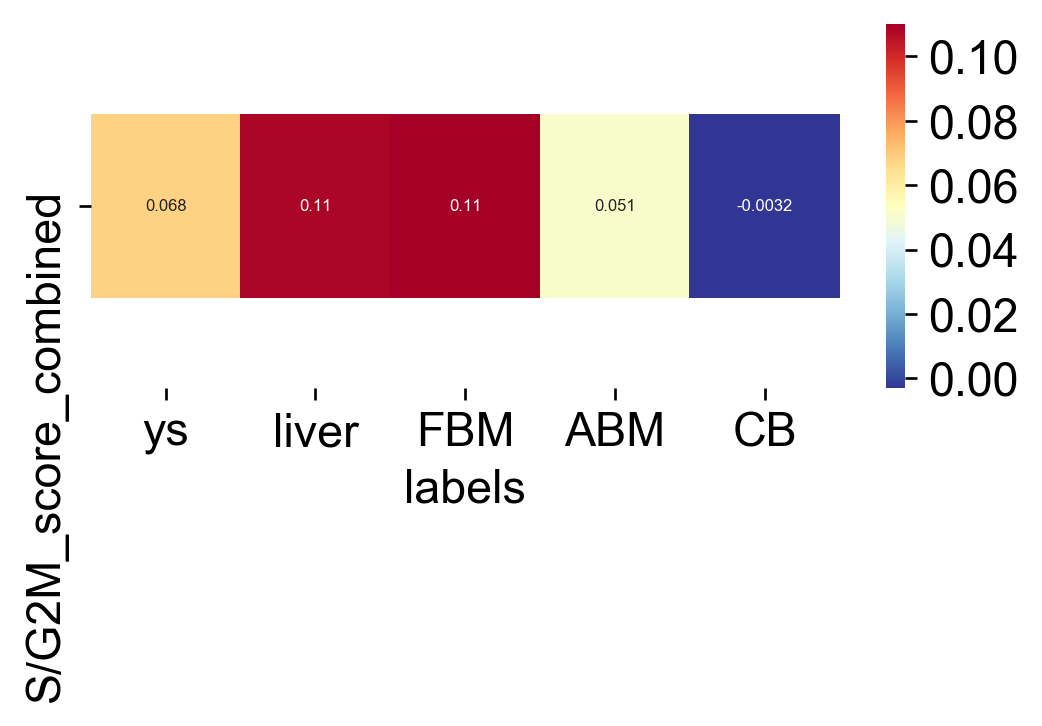

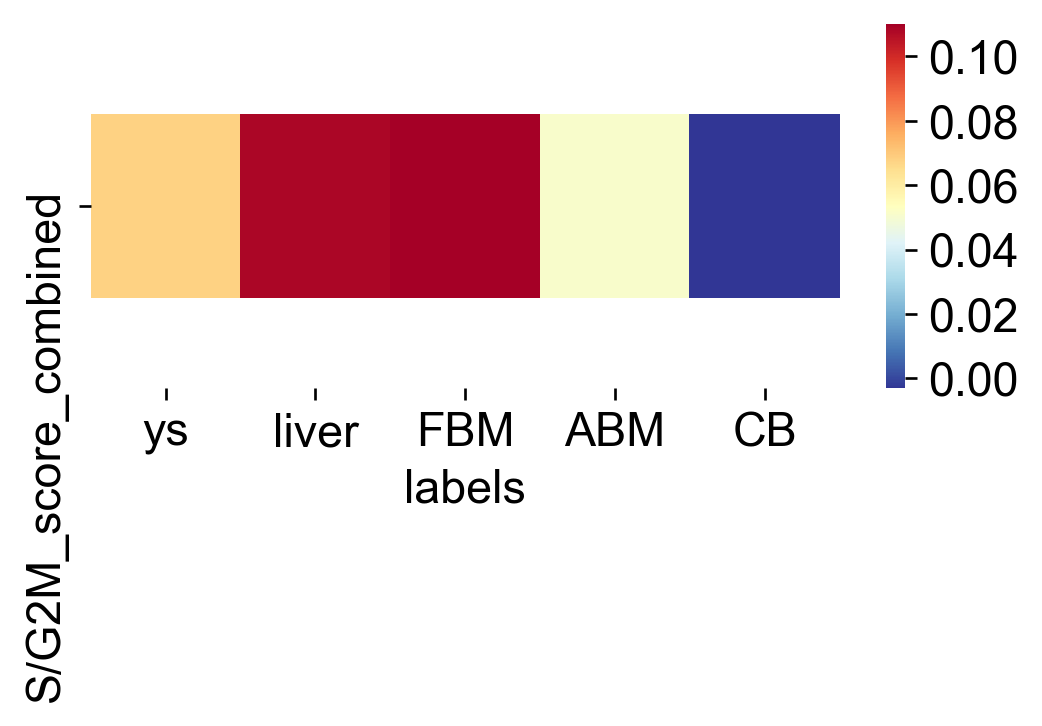

In [69]:
plt.figure(figsize=(5, 2))
fig = sns.heatmap(mean_enrichment_scores_df, annot=True, fmt=".2", annot_kws={"size": 5}, cmap="RdYlBu_r").get_figure() #xticklabels=cell_label_order, yticklabels=cell_label_order,
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
fig.savefig("figures/fig4c_progenitor_compartment_cross_tissue_cycle_comparison_numbers_yes_20200721.pdf")

plt.figure(figsize=(5, 2))
fig = sns.heatmap(mean_enrichment_scores_df, cmap="RdYlBu_r").get_figure() 
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
fig.savefig("figures/fig4c_progenitor_compartment_cross_tissue_cycle_comparison_numbers_no_20200721.pdf")

# Save the data

In [70]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [71]:
adata.X

<12805x27061 sparse matrix of type '<class 'numpy.float32'>'
	with 36541862 stored elements in Compressed Sparse Row format>

In [72]:
adata.raw.X

<12805x27061 sparse matrix of type '<class 'numpy.float32'>'
	with 41588467 stored elements in Compressed Sparse Row format>

In [73]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig4c_progen_cross_tissue_20200721.h5ad")

... storing 'AnnatomicalPart' as categorical
... storing 'age' as categorical
... storing 'april_cell.labels' as categorical
... storing 'auto_prd' as categorical
... storing 'backlabeled_1' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels2' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200717' as categorical
... storing 'cell.labels_20200718' as categorical
... storing 'cell.labels_july' as categorical
... storing 'cell.labels_progen' as categorical
... storing 'combined.labels' as categorical
... storing 'doublets' as categorical
... storing 'ethnicity' as categorical
... storing 'fetal.ids' as categorical
... storing 'full.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 